In [1]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path as path
import math
from scipy.interpolate import griddata

import osmnx as ox
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

from utility_functions import *

## Read HAZUS Fragility Data

In [2]:
#Read Hazus fragility data for plotting purposes
filepath = path.abspath(path.join('hazus_bridge_fragility.csv'))
hazus_fragilities = pd.read_csv(filepath)

In [3]:
hazus_fragilities

,HAZUS_CLASS,median_slight_Sa10,median_moderate_Sa10,median_extensive_Sa10,median_complete_Sa10,beta_slight_Sa10,beta_moderate_Sa10,beta_extensive_Sa10,beta_complete_Sa10,median_slight_pgd,...,median_extensive_pgd,median_complete_pgd,beta_slight_pgd,beta_moderate_pgd,beta_extensive_pgd,beta_complete_pgd,EQ,A,B,I_shape
0,HWB1,0.40,0.50,0.70,0.9,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ1,0.25,1,0
1,HWB2,0.60,0.90,1.10,1.7,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ1,0.25,1,0
2,HWB3,0.80,1.00,1.20,1.7,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ1,0.25,1,1
3,HWB4,0.80,1.00,1.20,1.7,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ1,0.25,1,1
4,HWB5,0.25,0.35,0.45,0.7,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ1,0.25,1,0
5,HWB6,0.30,0.50,0.60,0.9,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ1,0.25,1,0
6,HWB7,0.50,0.80,1.10,1.7,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ1,0.25,1,0
7,HWB8,0.35,0.45,0.55,0.8,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ2,0.33,0,0
8,HWB9,0.60,0.90,1.30,1.6,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ3,0.33,1,0
9,HWB10,0.60,0.90,1.10,1.5,0.6,0.6,0.6,0.6,3.9,...,3.9,13.8,0.2,0.2,0.2,0.2,EQ2,0.33,0,1


## Read NBI Bridge Data for Tennessee

In [4]:
TN_bridges = pd.read_csv('TN_bridges.csv')
TN_bridges

/tmp/ipykernel_8262/2425871662.py:1: DtypeWarning: Columns (75) have mixed types. Specify dtype option on import or set low_memory=False.
  TN_bridges = pd.read_csv('TN_bridges.csv')


,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA
0,47,1TN0311,1,8,0,0,0,0,157,49060,...,Y,5,1100,2037,NaN,Y,73,F,5,68.53
1,47,1TN0312,1,8,0,0,0,0,157,49060,...,Y,5,250,2037,NaN,Y,73,G,7,69.68
2,47,1TN0313,1,8,0,0,0,0,157,49060,...,Y,5,250,2037,NaN,Y,73,F,6,68.64
3,47,1TN0314,1,8,0,0,0,0,157,49060,...,Y,5,250,2037,NaN,Y,73,F,6,68.64
4,47,1023750001,1,5,1,2375,0,1,1,55800,...,Y,8,760,2041,NaN,N,47,F,6,222.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20374,47,DAPFORCAT000042,1,8,0,0,0,0,125,28486,...,Y,6,500,2044,NaN,Y,74,G,7,455.10
20375,47,DAPFORCAT0BR026,1,8,0,0,0,0,125,0,...,Y,8,1000,2044,NaN,Y,74,F,6,92.72
20376,47,DAPFORCAT0BR033,1,8,8,0,0,0,161,0,...,Y,8,300,2044,NaN,Y,74,G,7,107.80
20377,47,DAPFORCAT0BR076,1,8,0,0,0,0,125,28486,...,Y,8,300,2044,NaN,Y,74,G,7,52.56


In [5]:
# Convert column names to lowercase
TN_bridges.columns = TN_bridges.columns.str.lower()

In [6]:
# Function to convert DMS to Decimal Degrees
def dms_to_dd(dms_str, is_longitude=False):
    if is_longitude:
        deg = int(dms_str[:2])  # First three digits for longitude degrees
        dms_str = dms_str[2:]
    else:
        deg = int(dms_str[:2])  # First two digits for latitude degrees
        dms_str = dms_str[2:]
    
    min_ = int(dms_str[:2])  # Next two digits for minutes
    sec = float(dms_str[2:]) / 100  # Convert last part to seconds with decimal

    # Convert to decimal degrees
    dd = deg + (min_ / 60) + (sec / 3600)
    
    return dd

In [7]:
# Apply conversion
TN_bridges['Latitude'] = TN_bridges['lat_016'].astype(str).apply(lambda x: dms_to_dd(x))
TN_bridges['Longitude'] = TN_bridges['long_017'].astype(str).apply(lambda x: dms_to_dd(x, is_longitude=True))

# Ensure longitudes are negative for the Western Hemisphere
TN_bridges['Longitude'] *= -1

In [8]:
TN_bridges = TN_bridges[['state_code_001',
                         'year_built_027',
                         'degrees_skew_034',
                         'structure_kind_043a', 
                         'structure_type_043b',  
                         'main_unit_spans_045', 
                         'max_span_len_mt_048',
                         'structure_len_mt_049',
                         'Latitude', 
                         'Longitude']]
TN_bridges

,state_code_001,year_built_027,degrees_skew_034,structure_kind_043a,structure_type_043b,main_unit_spans_045,max_span_len_mt_048,structure_len_mt_049,Latitude,Longitude
0,47,1942,0,7,2,3,2.7,8.9,35.341336,-89.855197
1,47,1947,0,1,4,1,6.1,6.7,35.335769,-89.867783
2,47,1947,0,1,4,1,6.1,6.6,35.331583,-89.868333
3,47,1947,0,1,4,1,6.1,6.6,35.330222,-89.868250
4,47,1982,0,5,2,2,11.4,24.2,36.051533,-84.339036
...,...,...,...,...,...,...,...,...,...,...
20374,47,2022,0,5,2,1,36.1,37.0,36.595731,-87.629450
20375,47,2012,0,1,19,4,1.2,12.2,36.634639,-87.783750
20376,47,2020,0,1,19,4,2.4,11.0,36.576861,-87.695111
20377,47,1980,45,1,19,2,3.4,7.2,36.578169,-87.545419


In [9]:
TN_bridges = NBI_Defaults(TN_bridges)

In [10]:
# def assign_hazus_classes(row):
#     hazus_class = get_hazus_class(row)
#     bridge_df_hazus = hazus_fragilities.loc[hazus_fragilities['HAZUS_CLASS'] == hazus_class]
#     bridge_df_hazus.reset_index(drop=True, inplace=True)
    
#     #Combine the hazus and NBI data
#     bridge_df = pd.concat([TN_bridges, bridge_df_hazus], axis = 1)
    
#     return bridge_df

## Create a GeoDataFrame Object for Mapping

In [11]:
# Create a GeoDataFrame
TN_bridges_gdf = gpd.GeoDataFrame(TN_bridges, 
                       geometry=gpd.points_from_xy(TN_bridges['Longitude'], 
                                                   TN_bridges['Latitude']),
                       crs="EPSG:4326")  # WGS 84


In [12]:
del TN_bridges

## Create a boundary for Shelby County and filter bridges inside the boundary

In [13]:
# Load the boundary shapefile (e.g., a county or state boundary)
boundary = gpd.read_file("boundary_shapefiles/tl_2019_47157_faces.shp")  # Replace with the actual shapefile path

# Ensure the boundary is in WGS 84 (EPSG:4326)
boundary = boundary.to_crs("EPSG:4326")

# Spatial join: Keep only bridges inside the boundary
Shelby_bridges_gdf = gpd.sjoin(TN_bridges_gdf, boundary[['TFID', 'geometry']], predicate="within")

Shelby_bridges_gdf = Shelby_bridges_gdf.reset_index(drop = True)

In [14]:
Shelby_bridges_gdf

,state_code_001,year_built_027,degrees_skew_034,structure_kind_043a,structure_type_043b,main_unit_spans_045,max_span_len_mt_048,structure_len_mt_049,Latitude,Longitude,geometry,index_right,TFID
0,47,1942,0,7,2,3,2.7,8.9,35.341336,-89.855197,POINT (-89.8552 35.34134),13993,226580048
1,47,1947,0,1,4,1,6.1,6.7,35.335769,-89.867783,POINT (-89.86778 35.33577),13850,205579946
2,47,1947,0,1,4,1,6.1,6.6,35.331583,-89.868333,POINT (-89.86833 35.33158),13846,258761341
3,47,1947,0,1,4,1,6.1,6.6,35.330222,-89.868250,POINT (-89.86825 35.33022),13703,258761335
4,47,2010,45,2,19,2,5.9,11.8,35.196472,-89.956781,POINT (-89.95678 35.19647),20515,259729997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,47,1970,15,4,2,3,41.8,296.9,35.253083,-90.025611,POINT (-90.02561 35.25308),803,205575826
1072,47,1970,15,4,2,3,41.8,296.9,35.253056,-90.025864,POINT (-90.02586 35.25306),802,224205015
1073,47,1970,0,2,19,2,3.0,7.0,35.295472,-90.020447,POINT (-90.02045 35.29547),17988,205575773
1074,47,1966,45,2,19,2,3.0,7.3,35.263194,-90.027581,POINT (-90.02758 35.26319),11008,265354614


## Plot the Bridge Locations

In [15]:
# # Plot the points
# fig, ax = plt.subplots(figsize=(8, 6))

# Shelby_bridges_gdf = Shelby_bridges_gdf.to_crs(epsg=3857)
# Shelby_bridges_gdf.plot(ax=ax, color='red', markersize=20)

# # Add basemap
# ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=14)
    
# # Title and show plot
# ax.set_title("Bridge Locations in Tennessee (NBI Data)")
# plt.show()

## Get the appropriate fragility parameters based on bridge characteristics

In [16]:
Shelby_bridges_gdf = get_fragilities(Shelby_bridges_gdf, hazus_fragilities)

In [17]:
Shelby_bridges_gdf.columns

Index(['state_code_001', 'year_built_027', 'degrees_skew_034',
       'structure_kind_043a', 'structure_type_043b', 'main_unit_spans_045',
       'max_span_len_mt_048', 'structure_len_mt_049', 'Latitude', 'Longitude',
       'geometry', 'index_right', 'TFID', 'HAZUS_CLASS', 'median_slight_Sa10',
       'median_moderate_Sa10', 'median_extensive_Sa10', 'median_complete_Sa10',
       'beta_slight_Sa10', 'beta_moderate_Sa10', 'beta_extensive_Sa10',
       'beta_complete_Sa10', 'median_slight_pgd', 'median_moderate_pgd',
       'median_extensive_pgd', 'median_complete_pgd', 'beta_slight_pgd',
       'beta_moderate_pgd', 'beta_extensive_pgd', 'beta_complete_pgd', 'EQ',
       'A', 'B', 'I_shape'],
      dtype='object')

## Attach a Hazard Map

### PGA

In [18]:
# Load the .dat file (adjust delimiter if needed)
grid_df = pd.read_csv("2014_pga10pct50yrs.dat", delim_whitespace=True, skiprows = 2, names=["lon", "lat", "hazard"])
grid_pga = gpd.GeoDataFrame(grid_df, geometry=gpd.points_from_xy(grid_df["lon"], grid_df["lat"]), crs="EPSG:4326")

# Spatial join: Keep only bridges inside the boundary
grid_pga = gpd.sjoin(grid_pga, boundary[['TFID', 'geometry']], predicate="within")

grid_pga = grid_pga.reset_index(drop = True)

del grid_df

/tmp/ipykernel_8262/1506686746.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  grid_df = pd.read_csv("2014_pga10pct50yrs.dat", delim_whitespace=True, skiprows = 2, names=["lon", "lat", "hazard"])


### Sa03

In [19]:
# Load the .dat file (adjust delimiter if needed)
grid_df = pd.read_csv("2014_5hz10pct50yrs.dat", delim_whitespace=True, skiprows = 2, names=["lon", "lat", "hazard"])
grid_sa03 = gpd.GeoDataFrame(grid_df, geometry=gpd.points_from_xy(grid_df["lon"], grid_df["lat"]), crs="EPSG:4326")

# Spatial join: Keep only bridges inside the boundary
grid_sa03 = gpd.sjoin(grid_sa03, boundary[['TFID', 'geometry']], predicate="within")

grid_sa03 = grid_sa03.reset_index(drop = True)

del grid_df

/tmp/ipykernel_8262/435993601.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  grid_df = pd.read_csv("2014_5hz10pct50yrs.dat", delim_whitespace=True, skiprows = 2, names=["lon", "lat", "hazard"])


### Sa10

In [20]:
# Load the .dat file (adjust delimiter if needed)
grid_df = pd.read_csv("2014_pga10pct50yrs.dat", delim_whitespace=True, skiprows = 2, names=["lon", "lat", "hazard"])
# NOTE: In the above line, we read the PGA as Sa(1.0), since the Sa(1.0) values are too low compared to PGA and there is a risk of underestimating damage.
# This is another example of why HAZUS fragilities are not widely used and need further improvement.
grid_sa10 = gpd.GeoDataFrame(grid_df, geometry=gpd.points_from_xy(grid_df["lon"], grid_df["lat"]), crs="EPSG:4326")

# Spatial join: Keep only bridges inside the boundary
grid_sa10 = gpd.sjoin(grid_sa10, boundary[['TFID', 'geometry']], predicate="within")

grid_sa10 = grid_sa10.reset_index(drop = True)

del grid_df

/tmp/ipykernel_8262/3501609217.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  grid_df = pd.read_csv("2014_pga10pct50yrs.dat", delim_whitespace=True, skiprows = 2, names=["lon", "lat", "hazard"])


In [21]:
# Prepare grid and bridge points
grid_points = np.array(list(zip(grid_pga["lon"], grid_pga["lat"])))
grid_values = grid_pga["hazard"].values
bridge_points = np.array(list(zip(Shelby_bridges_gdf["geometry"].x, Shelby_bridges_gdf["geometry"].y)))

# Interpolate hazard values at bridge locations
Shelby_bridges_gdf["PGA"] = griddata(grid_points, grid_values, bridge_points, method="linear")  # Use "nearest" or "cubic" if needed


In [22]:
# Prepare grid and bridge points
grid_points = np.array(list(zip(grid_sa03["lon"], grid_sa03["lat"])))
grid_values = grid_sa03["hazard"].values
bridge_points = np.array(list(zip(Shelby_bridges_gdf["geometry"].x, Shelby_bridges_gdf["geometry"].y)))

# Interpolate hazard values at bridge locations
Shelby_bridges_gdf["Sa03"] = griddata(grid_points, grid_values, bridge_points, method="linear")  # Use "nearest" or "cubic" if needed


In [23]:
# Prepare grid and bridge points
grid_points = np.array(list(zip(grid_sa10["lon"], grid_sa10["lat"])))
grid_values = grid_sa10["hazard"].values
bridge_points = np.array(list(zip(Shelby_bridges_gdf["geometry"].x, Shelby_bridges_gdf["geometry"].y)))

# Interpolate hazard values at bridge locations
Shelby_bridges_gdf["Sa10"] = griddata(grid_points, grid_values, bridge_points, method="linear")  # Use "nearest" or "cubic" if needed


In [24]:
Shelby_bridges_gdf

,state_code_001,year_built_027,degrees_skew_034,structure_kind_043a,structure_type_043b,main_unit_spans_045,max_span_len_mt_048,structure_len_mt_049,Latitude,Longitude,...,beta_moderate_pgd,beta_extensive_pgd,beta_complete_pgd,EQ,A,B,I_shape,PGA,Sa03,Sa10
0,47,1942,0,7,2,3,2.7,8.9,35.341336,-89.855197,...,0.2,0.2,0.2,NaN,0.00,0,0,0.226614,0.390871,0.226614
1,47,1947,0,1,4,1,6.1,6.7,35.335769,-89.867783,...,0.2,0.2,0.2,EQ1,0.25,1,0,0.227305,0.391894,0.227305
2,47,1947,0,1,4,1,6.1,6.6,35.331583,-89.868333,...,0.2,0.2,0.2,EQ1,0.25,1,0,0.226472,0.390449,0.226472
3,47,1947,0,1,4,1,6.1,6.6,35.330222,-89.868250,...,0.2,0.2,0.2,EQ1,0.25,1,0,0.226182,0.389944,0.226182
4,47,2010,45,2,19,2,5.9,11.8,35.196472,-89.956781,...,0.2,0.2,0.2,NaN,0.00,0,0,0.212889,0.365719,0.212889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,47,1970,15,4,2,3,41.8,296.9,35.253083,-90.025611,...,0.2,0.2,0.2,EQ5,0.05,0,1,0.230637,0.396307,0.230637
1072,47,1970,15,4,2,3,41.8,296.9,35.253056,-90.025864,...,0.2,0.2,0.2,EQ5,0.05,0,1,0.230653,0.396336,0.230653
1073,47,1970,0,2,19,2,3.0,7.0,35.295472,-90.020447,...,0.2,0.2,0.2,NaN,0.00,0,0,0.239660,0.411688,0.239660
1074,47,1966,45,2,19,2,3.0,7.3,35.263194,-90.027581,...,0.2,0.2,0.2,NaN,0.00,0,0,0.233290,0.400805,0.233290


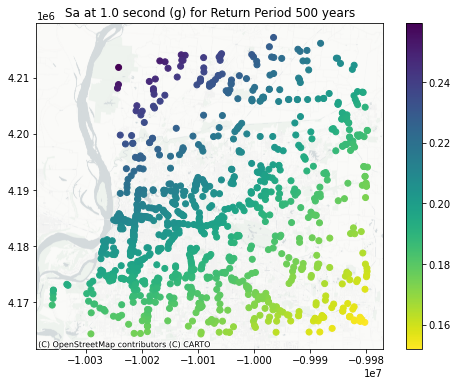

In [25]:
# Plot the points
fig, ax = plt.subplots(figsize=(8, 6))

# Plot using a specific column for colors
Shelby_bridges_gdf = Shelby_bridges_gdf.to_crs(epsg=3857)
Shelby_bridges_gdf.plot(ax=ax, column="Sa10", cmap="viridis_r", legend=True)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=14)
    
# Title and show plot
ax.set_title("Sa at 1.0 second (g) for Return Period 500 years")
plt.show()

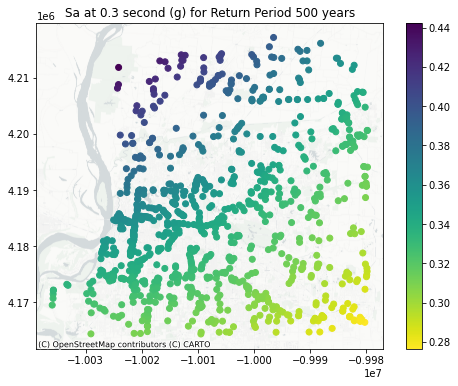

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot using a specific column for colors
Shelby_bridges_gdf = Shelby_bridges_gdf.to_crs(epsg=3857)
Shelby_bridges_gdf.plot(ax=ax, column="Sa03", cmap="viridis_r", legend=True)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=14)
    
# Title and show plot
ax.set_title("Sa at 0.3 second (g) for Return Period 500 years")
plt.show()

In [27]:
# Shelby_bridges_gdf['PGA'] = 0.4
# Shelby_bridges_gdf['Sa03'] = 0.5
# Shelby_bridges_gdf['Sa10'] = 0.7

## Read the Transportation Network Shapefiles

In [28]:
# Step 1: Read the shapefiles
nodes = gpd.read_file("graph_shapefiles/nodes.shp")
edges = gpd.read_file("graph_shapefiles/edges.shp")

G = create_networkx_graph(nodes, edges, fromnode = 'u', tonode = 'v', node_id = 'osmid')

## Assign each Bridge to nearest network link

In [29]:
from shapely.ops import nearest_points

def find_true_nearest_edge(bridge_geom, edges_gdf):
    # Find the distance from the bridge point to all edges
    distances = edges_gdf.geometry.distance(bridge_geom)
    
    # Get index of the edge with the minimum distance
    nearest_idx = distances.idxmin()
    
    # Retrieve edge row
    candidate = edges_gdf.loc[nearest_idx]
    
    return pd.Series({
        'u': int(candidate['u']),
        'v': int(candidate['v']),
        'key': int(candidate.get('key', 0)),
        'edge_id': f"{candidate['u']}_{candidate['v']}_{candidate.get('key', 0)}",
        'distance_to_edge': distances[nearest_idx]
    })

In [30]:
# Ensure CRS matches
bridges = Shelby_bridges_gdf.to_crs(edges.crs)

# Apply the fixed nearest-edge function
bridge_matches = bridges['geometry'].apply(
    lambda geom: find_true_nearest_edge(geom, edges)
)

bridge_matches = bridge_matches[bridge_matches['distance_to_edge'] < 100.0]

# Merge with original bridge data
bridges = bridges.join(bridge_matches)

In [31]:
bridges = bridges.dropna(subset=['distance_to_edge'])

bridges = bridges.reset_index(drop = True)
bridge_matches = bridge_matches.reset_index(drop = True)

In [32]:
bridges = bridges[bridges['distance_to_edge'] < 100.0]

bridges = bridges.reset_index(drop = True)

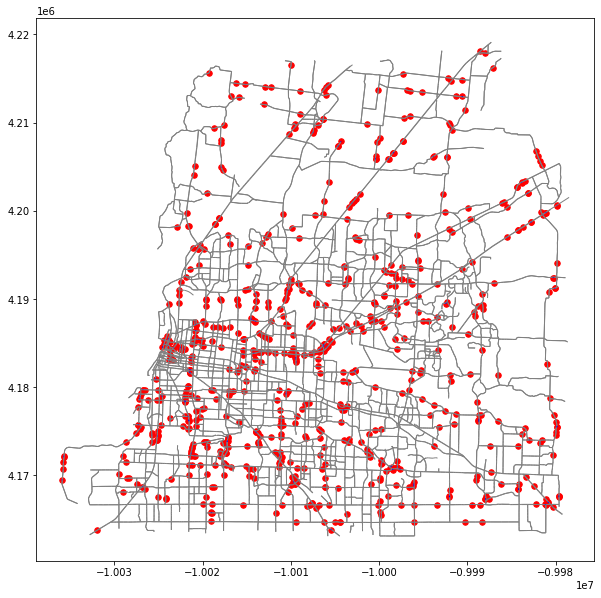

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, color='gray', linewidth=1)
bridges.plot(ax=ax, color='red', markersize=30)

# Optionally, add nearest edge line connections
for _, row in bridges.iterrows():
    bridge_pt = row.geometry
    edge_geom = edges[
        (edges['u'] == row['u']) & (edges['v'] == row['v']) & (edges['key'] == row['key'])
    ].geometry.values[0]
    
    nearest_pt_on_edge = edge_geom.interpolate(edge_geom.project(bridge_pt))
    ax.plot(
        [bridge_pt.x, nearest_pt_on_edge.x],
        [bridge_pt.y, nearest_pt_on_edge.y],
        color='blue', linestyle='--'
    )

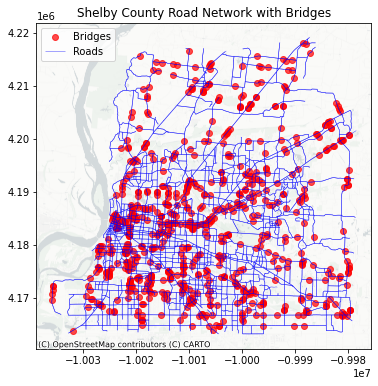

In [34]:
# Plot the points
fig, ax = plt.subplots(figsize=(8, 6))

# Plot using a specific column for colors
bridges.plot(ax=ax, color="red", alpha = 0.7, label = 'Bridges')
# Plot edges (roads)
edges.plot(ax=ax, linewidth=0.5, edgecolor="blue", alpha=0.7, label = 'Roads')

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=14)
    
# Title and show plot
ax.set_title("Shelby County Road Network with Bridges")
ax.legend()
plt.show()

In [35]:
bridges

,state_code_001,year_built_027,degrees_skew_034,structure_kind_043a,structure_type_043b,main_unit_spans_045,max_span_len_mt_048,structure_len_mt_049,Latitude,Longitude,...,B,I_shape,PGA,Sa03,Sa10,u,v,key,edge_id,distance_to_edge
0,47,2010,45,2,19,2,5.9,11.8,35.196472,-89.956781,...,0,0,0.212889,0.365719,0.212889,6.301362e+08,2.037272e+08,0.0,630136209_203727169_0,44.300067
1,47,1966,0,3,2,3,9.8,29.2,35.006139,-89.726386,...,1,0,0.156550,0.284195,0.156550,2.036374e+08,2.036374e+08,0.0,203637421_203637430_0,8.797583
2,47,1975,0,1,19,1,6.7,7.3,35.205611,-89.914169,...,1,1,0.210372,0.361521,0.210372,2.036914e+08,2.039336e+08,0.0,203691427_203933634_0,18.383071
3,47,1975,45,2,19,2,3.0,6.7,35.205167,-89.883858,...,0,0,0.206917,0.355849,0.206917,4.242252e+09,4.242252e+09,0.0,4242251660_4242251653_0,20.774613
4,47,1952,0,2,19,2,3.7,8.2,35.204361,-89.866058,...,0,0,0.204521,0.352000,0.204521,1.566790e+09,2.471604e+09,0.0,1566789905_2471603747_0,18.168145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,47,1970,15,4,2,3,41.8,296.9,35.253083,-90.025611,...,0,1,0.230637,0.396307,0.230637,2.038040e+08,2.038040e+08,0.0,203804009_203803999_0,11.156592
733,47,1970,15,4,2,3,41.8,296.9,35.253056,-90.025864,...,0,1,0.230653,0.396336,0.230653,2.825627e+09,2.825627e+09,0.0,2825626892_2825626898_0,7.611774
734,47,1970,0,2,19,2,3.0,7.0,35.295472,-90.020447,...,0,0,0.239660,0.411688,0.239660,2.039804e+08,2.038233e+08,0.0,203980415_203823262_0,9.808743
735,47,1966,45,2,19,2,3.0,7.3,35.263194,-90.027581,...,0,0,0.233290,0.400805,0.233290,2.038040e+08,2.825610e+09,0.0,203803987_2825609655_0,11.995682


## Perform Fragility Analysis

In [36]:
# Shelby_bridges_gdf = adjust_fragilities(Shelby_bridges_gdf)

DSs = [1, 2, 3, 4]

# Get probabilities of exceeding each damage state
for ds in DSs:
    Pf = bridge_frag(bridges, ds)
    bridges['prob_exc_ds_{}'.format(ds)] = Pf

In [37]:
# Get probability of each damage state
bridges['prob_ds_0'] = 1 - bridges['prob_exc_ds_1']
for ds in DSs:
    if ds < max(DSs):
        bridges['prob_ds_{}'.format(ds)] = bridges['prob_exc_ds_{}'.format(ds)] - bridges['prob_exc_ds_{}'.format(ds+1)]
    else:
        bridges['prob_ds_{}'.format(ds)] = bridges['prob_exc_ds_{}'.format(ds)]

In [38]:
bridges

,state_code_001,year_built_027,degrees_skew_034,structure_kind_043a,structure_type_043b,main_unit_spans_045,max_span_len_mt_048,structure_len_mt_049,Latitude,Longitude,...,distance_to_edge,prob_exc_ds_1,prob_exc_ds_2,prob_exc_ds_3,prob_exc_ds_4,prob_ds_0,prob_ds_1,prob_ds_2,prob_ds_3,prob_ds_4
0,47,2010,45,2,19,2,5.9,11.8,35.196472,-89.956781,...,44.300067,0.013678,0.004964,0.001975,0.000267,0.986322,0.008714,0.002990,0.001707,0.000267
1,47,1966,0,3,2,3,9.8,29.2,35.006139,-89.726386,...,8.797583,0.217655,0.089972,0.039222,0.006277,0.782345,0.127682,0.050750,0.032945,0.006277
2,47,1975,0,1,19,1,6.7,7.3,35.205611,-89.914169,...,18.383071,0.012999,0.004687,0.001854,0.000248,0.987001,0.008313,0.002833,0.001606,0.000248
3,47,1975,45,2,19,2,3.0,6.7,35.205167,-89.883858,...,20.774613,0.012104,0.004323,0.001697,0.000224,0.987896,0.007781,0.002626,0.001473,0.000224
4,47,1952,0,2,19,2,3.7,8.2,35.204361,-89.866058,...,18.168145,0.011506,0.004083,0.001594,0.000208,0.988494,0.007423,0.002489,0.001386,0.000208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,47,1970,15,4,2,3,41.8,296.9,35.253083,-90.025611,...,11.156592,0.024685,0.024685,0.024685,0.004611,0.975315,0.000000,0.000000,0.020074,0.004611
733,47,1970,15,4,2,3,41.8,296.9,35.253056,-90.025864,...,7.611774,0.024692,0.024692,0.024692,0.004613,0.975308,0.000000,0.000000,0.020079,0.004613
734,47,1970,0,2,19,2,3.0,7.0,35.295472,-90.020447,...,9.808743,0.022269,0.008635,0.003629,0.000547,0.977731,0.013634,0.005006,0.003082,0.000547
735,47,1966,45,2,19,2,3.0,7.3,35.263194,-90.027581,...,11.995682,0.019994,0.007638,0.003170,0.000466,0.980006,0.012356,0.004468,0.002704,0.000466


## Plot the Damage States

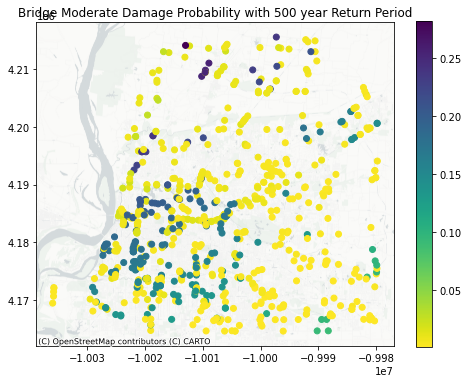

In [39]:
# Plot the points
fig, ax = plt.subplots(figsize=(8, 6))

# Plot using a specific column for colors
bridges.plot(ax=ax, column="prob_exc_ds_2", cmap="viridis_r", legend=True)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=14)
    
# Title and show plot
ax.set_title("Bridge Moderate Damage Probability with 500 year Return Period")
plt.show()

## Consequence Analysis - Functionality

Let us assign zero functionality to bridges with a moderate damage probability exceeding 10%.

Note that this is not a realistic way to simulate failure events, this is just done to ensure there are enough damaged bridges in the network that get reflected meaningfully in network-level functionality metrics. If you were actually working on this problem, you would do the following
* Get the probabilities of each damage state from the fragility model as shown here
* Tie it so some *functionality model* to get the probability of being functional given these damage state probabilities.
* Simulate *n* Monte Carlo realizations, each of which would be a possible state in which the network can exist. This means that for each realization, any given bridge, hence any given network link, can exist in either of two possible functionality states.

In [40]:
DRs = [0.0, 0.1, 0.4, 0.7, 1.0]

bridges['Functionality'] = 1.0

bridges.loc[bridges['prob_exc_ds_2'] >= 0.1, 'Functionality'] = 0.0

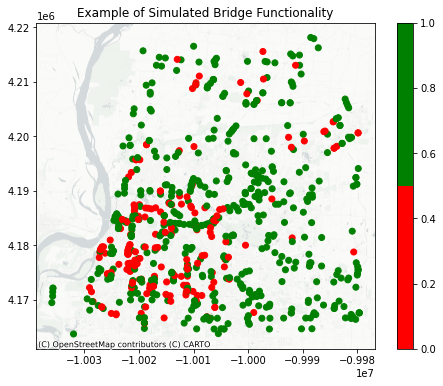

In [41]:
from matplotlib.colors import ListedColormap

# Plot the points
fig, ax = plt.subplots(figsize=(8, 6))

# Define custom binary colormap: red for 0, green for 1
binary_cmap = ListedColormap(['red', 'green'])

# Plot using a specific column for colors
bridges.plot(ax=ax, column="Functionality", cmap=binary_cmap, legend=True)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=14)
    
# Title and show plot
ax.set_title("Example of Simulated Bridge Functionality")
plt.show()

## Remove Links corresponding to Damaged Bridges

In [42]:
bridge_matches['Functionality'] = bridges['Functionality']

In [43]:
# Merge 'Functionality' from bridges into edges based on u and v
edges = edges.merge(
    bridge_matches[['u', 'v', 'Functionality']],
    on=['u', 'v'],
    how='left'  # or 'inner' if you only want matches
)
edges['Functionality'] = edges['Functionality'].fillna(1)

In [44]:
edges_functional = edges[edges['Functionality'] == 1.0].reset_index(drop = True)

In [45]:
# edges_functional = edges[edges['Functionality'] == 1].reset_index(drop = True)
G_damaged = create_networkx_graph(nodes, edges_functional, 
                                  fromnode = 'u',
                                  tonode = 'v',
                                  node_id = 'osmid')

## Plot the Damaged Network Edges

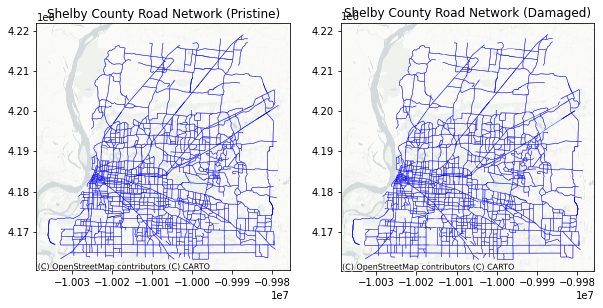

In [46]:
# Plot the points
fig, ax = plt.subplots(1, 2, figsize=(10, 20))

# Plot using a specific column for colors
# Plot edges (roads)
edges.plot(ax=ax[0], linewidth=0.5, edgecolor="blue", alpha=0.7, label = 'Roads')
edges_functional.plot(ax=ax[1], linewidth=0.5, edgecolor="blue", alpha=0.7, label = 'Roads')

# Add basemap
ctx.add_basemap(ax[0], source=ctx.providers.CartoDB.Positron, zoom=14)
ctx.add_basemap(ax[1], source=ctx.providers.CartoDB.Positron, zoom=14)
    
# Title and show plot
ax[0].set_title("Shelby County Road Network (Pristine)")
ax[1].set_title("Shelby County Road Network (Damaged)")
# ax.legend()
plt.show()

## Check Network Connectivity

In [47]:
# Pristine Network
nx.is_connected(G)

True

In [48]:
# Damaged Network
nx.is_connected(G_damaged)

False

## Number of Connected Components

In [49]:
nx.number_connected_components(G)

1

In [50]:
nx.number_connected_components(G_damaged)

7

## Node Degree Distribution

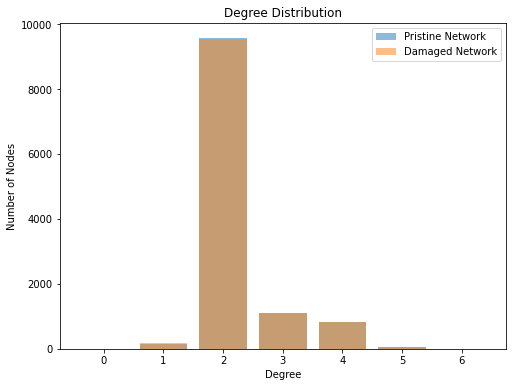

In [51]:
# Get Node Degrees
degrees_pristine = [deg for node, deg in G.degree()]
degrees_damaged = [deg for node, deg in G_damaged.degree()]

fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(degrees_pristine, bins=range(min(degrees_pristine), max(degrees_pristine) + 2), 
        align='left', rwidth=0.8, alpha = 0.5, label = 'Pristine Network')
ax.hist(degrees_damaged, bins=range(min(degrees_damaged), max(degrees_damaged) + 2), 
        align='left', rwidth=0.8, alpha = 0.5, label = 'Damaged Network')

plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution")
ax.legend()
plt.show()

## Network Efficiency 

In [52]:
efficiency_pristine = nx.global_efficiency(G)
print(f"Global Efficiency of Pristine Network: {efficiency_pristine}")

Global Efficiency of Pristine Network: 0.015408458006722817


In [53]:
efficiency_damaged = nx.global_efficiency(G_damaged)
print(f"Global Efficiency of Damaged Network: {efficiency_damaged}")

Global Efficiency of Damaged Network: 0.015271131954331718


In [54]:
relative_efficiency = efficiency_damaged/efficiency_pristine
print(f"Relative Network Efficiency (Functionality): {relative_efficiency}")

Relative Network Efficiency (Functionality): 0.9910876187395791
